#### Library Import

In [1]:
import pandas as pd
import numpy as np
import altair as alt
alt.renderers.enable("notebook")

RendererRegistry.enable('notebook')

#### Loading the files

In [2]:
ceo_df = pd.read_csv('Results/ceo.csv')
engr_df = pd.read_csv('Results/engr.csv')
nur_df = pd.read_csv('Results/nur.csv')
pol_df = pd.read_csv('Results/pol.csv')
st_df = pd.read_csv('Results/st.csv')

In [3]:
merged_df = pd.concat([ceo_df,engr_df,nur_df,pol_df,st_df])
merged_df = merged_df.drop('Unnamed: 0',axis=1)
merged_df = merged_df.reset_index()
merged_df = merged_df.drop('index', axis=1)

In [4]:
merged_df

,Query,Lang&Locale,Image_List,ImgSim_Intra,ImgSim_Cross
0,CEO,Arabic-West Asia & North Africa,"['Faces/CEO/Arabic\\ceo_ar_1.jpg', 'Faces/CEO/...",0.899012,0.984683
1,CEO,English-North America,"['Faces/CEO/English_NA\\ceo_engna_1.jpg', 'Fac...",0.968974,0.984683
2,CEO,English-West Europe,"['Faces/CEO/English_WE\\ceo_engwe_1.jpg', 'Fac...",0.929469,0.984683
3,CEO,Hindi-South Asia,"['Faces/CEO/Hindi\\ceo_hi_1.jpg', 'Faces/CEO/H...",0.997845,0.984683
4,CEO,Indonesian-SE Asia,"['Faces/CEO/Indonesian\\ceo_id_1.jpg', 'Faces/...",0.983675,0.984683
5,CEO,Mandarin-East Asia,"['Faces/CEO/Mandarin\\ceo_mnd_1.jpg', 'Faces/C...",0.989452,0.984683
6,CEO,Russian-East Europe,"['Faces/CEO/Russian\\ceo_ru_1.jpg', 'Faces/CEO...",0.959661,0.984683
7,CEO,Spanish-Latin America,"['Faces/CEO/Spanish\\ceo_es_1.jpg', 'Faces/CEO...",0.974743,0.984683
8,CEO,Swahili-Sub Saharan Africa,"['Faces/CEO/Swahili\\ceo_sw_1.jpg', 'Faces/CEO...",0.977119,0.984683
9,Engineer,Arabic-West Asia & North Africa,"['Faces/Engineer/Arabic\\engr_ar_1.jpg', 'Face...",0.986390,0.993904


In [5]:
merged_df.to_csv('Results/merged_data.csv')

#### Creating data frame for consolidated results

In [6]:
mean_is_intra_list = []
mean_is_cross_list = []
query_list = []
df_list = [ceo_df,engr_df,nur_df,pol_df,st_df]

for df in df_list:
    query_list.append(pd.unique(df['Query']))
    mean_is_intra_list.append(np.mean(df['ImgSim_Intra']))
    mean_is_cross_list.append(np.mean(df['ImgSim_Cross']))
    
    
results_df = pd.DataFrame(list(zip(query_list,mean_is_intra_list,mean_is_cross_list)),columns=['Query','Mean ImgSim Intra','Mean ImgSim Cross'])

In [7]:
results_df

,Query,Mean ImgSim Intra,Mean ImgSim Cross
0,[CEO],0.964439,0.984683
1,[Engineer],0.992552,0.993904
2,[Nurse],0.986263,0.989952
3,[Politician],0.972392,0.983637
4,[School Teacher],0.986089,0.990403


In [8]:
print('ImgSim Intra mean',np.mean(results_df['Mean ImgSim Intra']))
print('ImgSim Cross mean',np.mean(results_df['Mean ImgSim Cross']))

ImgSim Intra mean 0.9803471588061816
ImgSim Cross mean 0.9885158855626083


In [9]:
results_df.to_csv('Results/results_df.csv')

#### Analysis and Imsights

#### Diverse dataset

In [10]:
sliced_df = merged_df[(merged_df['ImgSim_Cross']>merged_df['ImgSim_Intra'])]

In [11]:
sliced_df

,Query,Lang&Locale,Image_List,ImgSim_Intra,ImgSim_Cross
0,CEO,Arabic-West Asia & North Africa,"['Faces/CEO/Arabic\\ceo_ar_1.jpg', 'Faces/CEO/...",0.899012,0.984683
1,CEO,English-North America,"['Faces/CEO/English_NA\\ceo_engna_1.jpg', 'Fac...",0.968974,0.984683
2,CEO,English-West Europe,"['Faces/CEO/English_WE\\ceo_engwe_1.jpg', 'Fac...",0.929469,0.984683
4,CEO,Indonesian-SE Asia,"['Faces/CEO/Indonesian\\ceo_id_1.jpg', 'Faces/...",0.983675,0.984683
6,CEO,Russian-East Europe,"['Faces/CEO/Russian\\ceo_ru_1.jpg', 'Faces/CEO...",0.959661,0.984683
7,CEO,Spanish-Latin America,"['Faces/CEO/Spanish\\ceo_es_1.jpg', 'Faces/CEO...",0.974743,0.984683
8,CEO,Swahili-Sub Saharan Africa,"['Faces/CEO/Swahili\\ceo_sw_1.jpg', 'Faces/CEO...",0.977119,0.984683
9,Engineer,Arabic-West Asia & North Africa,"['Faces/Engineer/Arabic\\engr_ar_1.jpg', 'Face...",0.986390,0.993904
10,Engineer,English-North America,['Faces/Engineer/English_NA\\engr_engna_1.jpg'...,0.988344,0.993904
13,Engineer,Indonesian-SE Asia,"['Faces/Engineer/Indonesian\\engr_id_1.jpg', '...",0.987191,0.993904


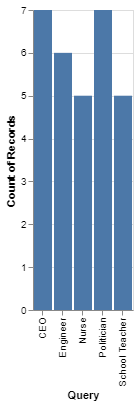

In [12]:
alt.Chart(sliced_df).mark_bar().encode(
    alt.X("Query"),
    y='count()',
    
)

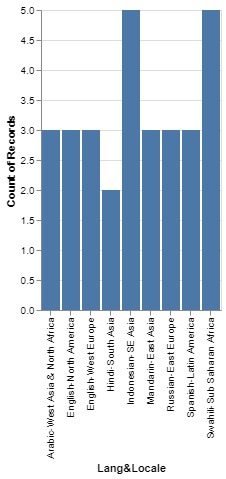

In [13]:
alt.Chart(sliced_df).mark_bar().encode(
    alt.X("Lang&Locale"),
    y='count()',
    
)

#### % of image sets with higher cross score

In [14]:
(len(sliced_df)/len(merged_df))*100

66.66666666666666

#### Whole Dataset

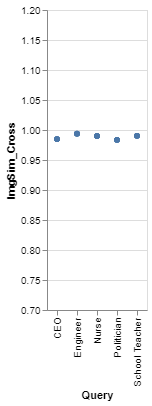

In [20]:
alt.Chart(merged_df).mark_circle().encode(
    alt.X("Query"),
    y=alt.Y('ImgSim_Cross', scale=alt.Scale(domain=[0.7, 1.2]),
    
))

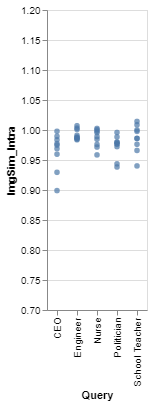

In [21]:
alt.Chart(merged_df).mark_circle().encode(
    alt.X("Query"),
    y=alt.Y('ImgSim_Intra', scale=alt.Scale(domain=[0.7, 1.2]),
    
))

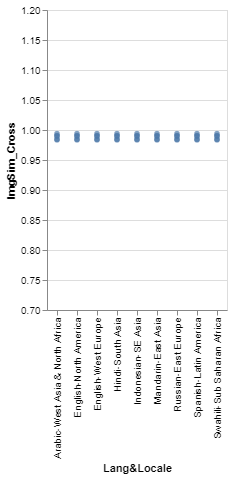

In [24]:
alt.Chart(merged_df).mark_circle().encode(
    alt.X("Lang&Locale"),
    y=alt.Y('ImgSim_Cross', scale=alt.Scale(domain=[0.7, 1.2]),
    
))

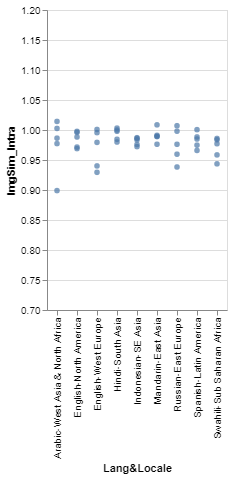

In [25]:
alt.Chart(merged_df).mark_circle().encode(
    alt.X("Lang&Locale"),
    y=alt.Y('ImgSim_Intra', scale=alt.Scale(domain=[0.7, 1.2]),
    
))